Animesh, welcome to the system! You are 30 years old. You have skills in: Python, Machine Learning, Data Science.


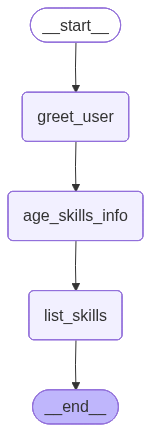

In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image


class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

def first_node(state: AgentState) -> AgentState:
    """First node for greeting message to user."""
    state['result'] = f"{state['name']}, welcome to the system!"
    return state

def second_node(state: AgentState) -> AgentState:
    """Second node for age and skills message."""
    state['result'] += f" You are {state['age']} years old."
    return state

def third_node(state: AgentState) -> AgentState:
    """Third node for listing skills."""
    skills_str = ', '.join(state['skills'])
    state['result'] += f" You have skills in: {skills_str}."
    return state

graph = StateGraph(AgentState)
graph.add_node("greet_user", first_node)
graph.add_node("age_skills_info", second_node)
graph.add_node("list_skills", third_node)
graph.add_edge(START, "greet_user")
graph.add_edge("greet_user", "age_skills_info")
graph.add_edge("age_skills_info", "list_skills")
graph.add_edge("list_skills", END)
app = graph.compile()
result = app.invoke({
    "name": "Animesh", "age": 30, "skills": ["Python", "Machine Learning", "Data Science"]
})
print(result['result'])
display(Image(app.get_graph().draw_mermaid_png()))